In [1]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display
import IPython.display as ipd
from pydub import AudioSegment
from pydub.utils import mediainfo
import warnings
warnings.filterwarnings('ignore')

C:\Users\shane\anaconda3\lib\site-packages\pydub\utils.py:170: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)


In [2]:
noisy_speech = AudioSegment.from_wav('NoisySignal/Station/sp01_station_sn5.wav')
noisy_s = noisy_speech.get_array_of_samples() # samples x(t)
noisy_f = noisy_speech.frame_rate # sampling rate f - see slide 24 in week 7 lecture slides

Text(0, 0.5, 'Amplitude')

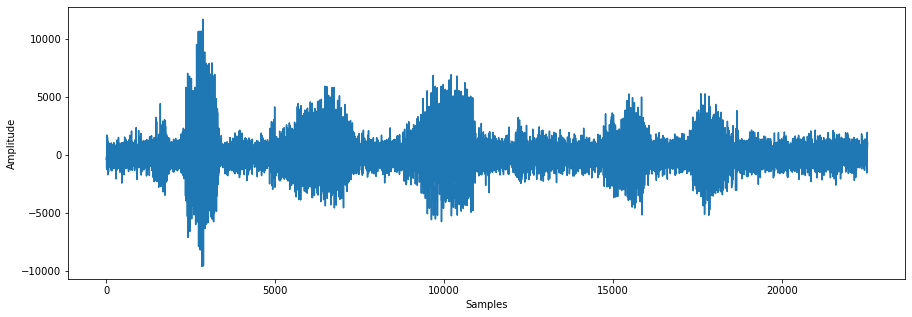

In [3]:
plt.figure(figsize = (15, 5))
plt.plot(noisy_s)
plt.xlabel('Samples')
plt.ylabel('Amplitude')

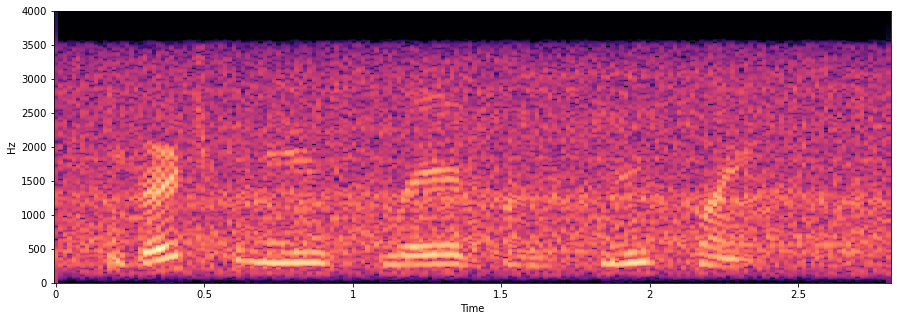

In [4]:
#range of frequencies of interest for speech signal. 
#It can be any positive value, but should be a power of 2
freq_range = 2048
#window size: the number of samples per frame
#each frame is of 30ms
win_length = int(noisy_f * 0.03)
#number of samples between two consecutive frames
#by default, hop_length = win_length / 4
hop_length = int(win_length / 2)
#windowing technique
window = 'hann'

noisy_S = librosa.stft(np.float32(noisy_s), n_fft = freq_range, window = window, hop_length = hop_length, win_length = win_length)
plt.figure(figsize = (15, 5))

#convert the amplitude to decibels, just for illustration purpose
noisy_Sdb = librosa.amplitude_to_db(abs(noisy_S))
librosa.display.specshow(noisy_Sdb, sr = noisy_f, x_axis = 'time',y_axis = 'linear', hop_length = hop_length)

In [5]:
from scipy import signal
#order
order = 10
#sampling frequency
sampling_freq = noisy_f
#cut-off frequency. This can be an array if band-pass filter is used
#this must be within 0 and cutoff_freq/2
cutoff_freq = 1000
#filter type, e.g., 'lowpass’, ‘highpass’, ‘bandpass’, ‘bandstop’
filter_type = 'lowpass'
#filter
h = signal.butter(N = order, fs = sampling_freq, Wn = cutoff_freq, btype = filter_type, analog = False, output = 'sos')

In [6]:
filtered_s = signal.sosfilt(h, noisy_s)

In [7]:
import array
import pydub
from pydub import AudioSegment
filtered_s_audio = pydub.AudioSegment(data = array.array(noisy_speech.array_type, np.float16(filtered_s)),
                                      sample_width = 2, 
                                      frame_rate = noisy_f,
                                      channels = 1)
filtered_s_audio.export('sp01_station_sn5_lowpass.wav', format = 'wav')

<_io.BufferedRandom name='sp01_station_sn5_lowpass.wav'>

Text(0, 0.5, 'Amplitude')

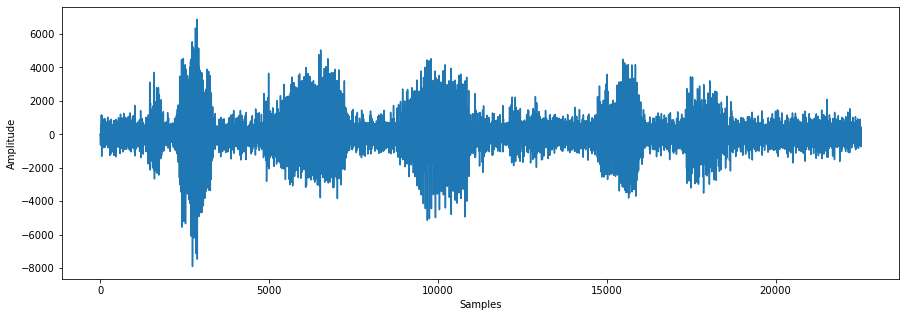

In [8]:
plt.figure(figsize = (15, 5))
plt.plot(filtered_s)
plt.xlabel('Samples')
plt.ylabel('Amplitude')

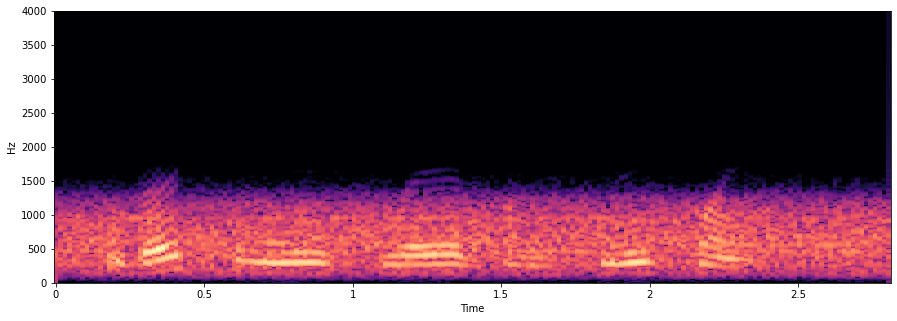

In [9]:
#range of frequencies of interest for speech signal. 
#It can be any positive value, but should be a power of 2
freq_range = 2048
#window size: the number of samples per frame
#each frame is of 30ms
win_length = int(noisy_f * 0.03)
#number of samples between two consecutive frames
#by default, hop_length = win_length / 4
hop_length = int(win_length / 2)
#windowing technique
window = 'hann'

filter_S = librosa.stft(np.float32(filtered_s), n_fft = freq_range, window = window, hop_length = hop_length, win_length = win_length)
plt.figure(figsize = (15, 5))

#convert the amplitude to decibels, just for illustration purpose
filter_Sdb = librosa.amplitude_to_db(abs(filter_S))
librosa.display.specshow(filter_Sdb, sr = noisy_f, x_axis = 'time',y_axis = 'linear', hop_length = hop_length)

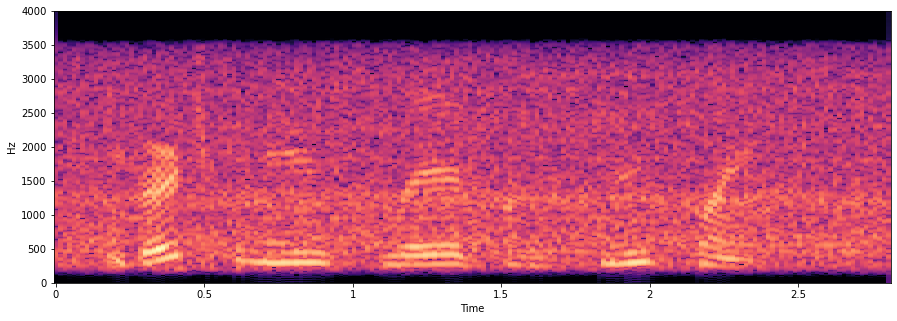

In [10]:
order = 10
#sampling frequency
sampling_freq = noisy_f
#cut-off frequency. This can be an array if band-pass filter is used
#this must be within 0 and cutoff_freq/2
cutoff_freq = 200
#filter type, e.g., 'lowpass’, ‘highpass’, ‘bandpass’, ‘bandstop’
filter_type = 'highpass'
#filter
h = signal.butter(N = order, fs = sampling_freq, Wn = cutoff_freq, btype = filter_type, analog = False, output = 'sos')
filtered_s = signal.sosfilt(h, noisy_s)

#range of frequencies of interest for speech signal. 
#It can be any positive value, but should be a power of 2
freq_range = 2048
#window size: the number of samples per frame
#each frame is of 30ms
win_length = int(noisy_f * 0.03)
#number of samples between two consecutive frames
#by default, hop_length = win_length / 4
hop_length = int(win_length / 2)
#windowing technique
window = 'hann'

filter_S = librosa.stft(np.float32(filtered_s), n_fft = freq_range, window = window, hop_length = hop_length, win_length = win_length)
plt.figure(figsize = (15, 5))

#convert the amplitude to decibels, just for illustration purpose
filter_Sdb = librosa.amplitude_to_db(abs(filter_S))
librosa.display.specshow(filter_Sdb, sr = noisy_f, x_axis = 'time',y_axis = 'linear', hop_length = hop_length)

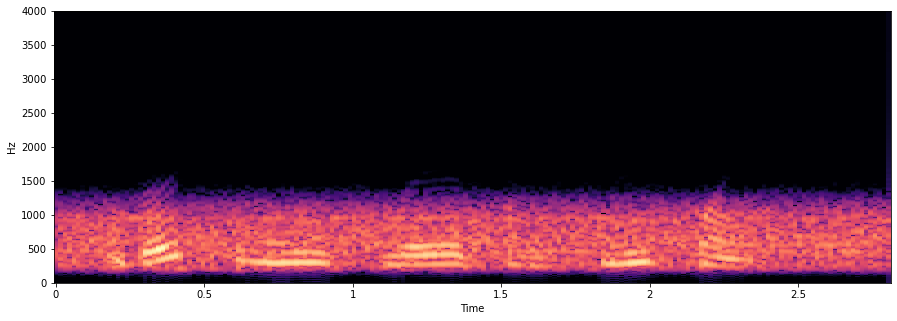

In [11]:
order = 10
#sampling frequency
sampling_freq = noisy_f
#cut-off frequency. This can be an array if band-pass filter is used
#this must be within 0 and cutoff_freq/2
cutoff_freq = [200,1000]
#filter type, e.g., 'lowpass’, ‘highpass’, ‘bandpass’, ‘bandstop’
filter_type = 'bandpass'
#filter
h = signal.butter(N = order, fs = sampling_freq, Wn = cutoff_freq, btype = filter_type, analog = False, output = 'sos')
filtered_s = signal.sosfilt(h, noisy_s)

#range of frequencies of interest for speech signal. 
#It can be any positive value, but should be a power of 2
freq_range = 2048
#window size: the number of samples per frame
#each frame is of 30ms
win_length = int(noisy_f * 0.03)
#number of samples between two consecutive frames
#by default, hop_length = win_length / 4
hop_length = int(win_length / 2)
#windowing technique
window = 'hann'

filter_S = librosa.stft(np.float32(filtered_s), n_fft = freq_range, window = window, hop_length = hop_length, win_length = win_length)
plt.figure(figsize = (15, 5))

#convert the amplitude to decibels, just for illustration purpose
filter_Sdb = librosa.amplitude_to_db(abs(filter_S))
librosa.display.specshow(filter_Sdb, sr = noisy_f, x_axis = 'time',y_axis = 'linear', hop_length = hop_length)

---- 

# Noisy Attenuation

In [12]:
# Read audio data from file
noisy_speech = AudioSegment.from_wav('NoisySignal/Station/sp01_station_sn5.wav') 
y = noisy_speech.get_array_of_samples() # samples x(t)
y_f = noisy_speech.frame_rate # sampling rate f - see slide 24 in week 7 lecture slides
#window size: the number of samples per frame, each frame is of 30ms
win_length = int(y_f * 0.03)
#number of samples between two consecutive frames, by default, hop_length = win_length / 4
hop_length = int(win_length / 2)
Y = librosa.stft(np.float32(y), n_fft = 2048, window = 'hann', hop_length = hop_length, win_length = win_length)
mag_Y = abs(Y)
mag_Y.shape

(1025, 188)

In [13]:
# Read audio data from file
n_speech = AudioSegment.from_wav('Noise/Station/Station_1.wav') 
d = n_speech.get_array_of_samples() # samples x(t)
d_f = n_speech.frame_rate # sampling rate f - see slide 24 in week 7 lecture slides
#window size: the number of samples per frame, each frame is of 30ms
dwin_length = int(d_f * 0.03)
#number of samples between two consecutive frames, by default, hop_length = win_length / 4
dhop_length = int(dwin_length / 2)
D = librosa.stft(np.float32(d), n_fft = 2048, window = 'hann', hop_length = dhop_length, win_length = dwin_length)
mag_D = abs(D)

In [14]:
square_mag_D = mag_D * mag_D
means_square_mag_D = np.mean(square_mag_D, axis=1)

H = np.zeros((mag_Y.shape[0], mag_Y.shape[1]), np.float32)

for k in range (H.shape[0]):
    for t in range(H.shape[1]):
        H[k][t] = np.sqrt(max(0, 1 - means_square_mag_D[k] / (mag_Y[k][t] * mag_Y[k][t])))
        
S_hat = np.zeros((mag_Y.shape[0], mag_Y.shape[1]), np.float32)
for k in range (H.shape[0]):
    for t in range(H.shape[1]):
        S_hat[k][t] = H[k][t] * Y[k][t]

In [15]:
swin_length = int(y_f * 0.03)
shop_length = int(swin_length / 2)
s_hat = librosa.istft(S_hat, win_length=swin_length, hop_length=shop_length, length=len(y))

In [16]:
s_hat_truncated = np.float16(s_hat)
for i, num in enumerate(s_hat_truncated):
    if num > 32767:
        s_hat_truncated[i] = 32767
    elif num < -32768:
        s_hat_truncated[i] = -3276

In [17]:
filtered_s_audio = pydub.AudioSegment(data = array.array('h', s_hat_truncated), 
                                      sample_width = 2, frame_rate = y_f, channels = 1)
filtered_s_audio.export('sp01_station_sn5_spectralsubtraction.wav', format = 'wav')

<_io.BufferedRandom name='sp01_station_sn5_spectralsubtraction.wav'>

----

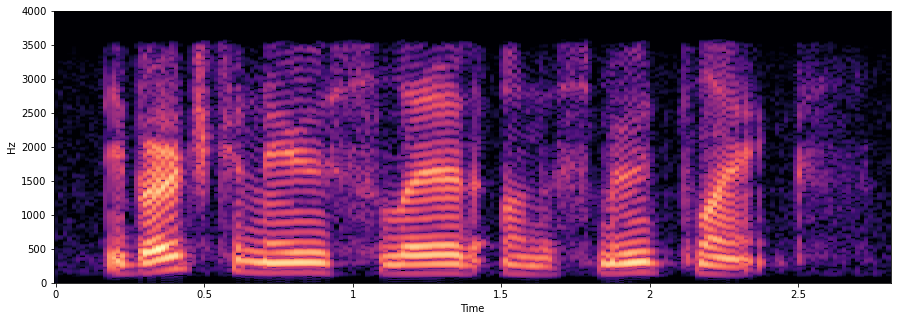

In [18]:
noisy_speech = AudioSegment.from_wav('CleanSignal\sp01.wav')
noisy_s = noisy_speech.get_array_of_samples() # samples x(t)
noisy_f = noisy_speech.frame_rate # sampling rate f - see slide 24 in week 7 lecture slides
#range of frequencies of interest for speech signal. 
#It can be any positive value, but should be a power of 2
freq_range = 2048
#window size: the number of samples per frame
#each frame is of 30ms
win_length = int(noisy_f * 0.03)
#number of samples between two consecutive frames
#by default, hop_length = win_length / 4
hop_length = int(win_length / 2)
#windowing technique
window = 'hann'

noisy_S = librosa.stft(np.float32(noisy_s), n_fft = freq_range, window = window, hop_length = hop_length, win_length = win_length)
plt.figure(figsize = (15, 5))

#convert the amplitude to decibels, just for illustration purpose
noisy_Sdb = librosa.amplitude_to_db(abs(noisy_S))
librosa.display.specshow(noisy_Sdb, sr = noisy_f, x_axis = 'time',y_axis = 'linear', hop_length = hop_length)

## Testing on Alternate Speech Signals

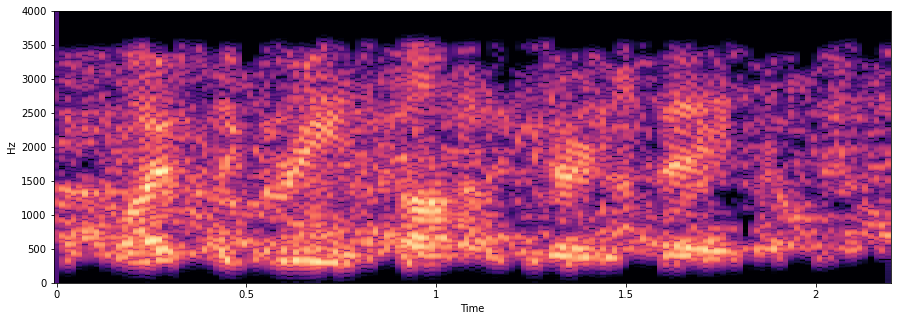

In [23]:
# Read audio data from file
noisy_speech = AudioSegment.from_wav('NoisySignal/Babble/sp05_babble_sn5.wav') 
y = noisy_speech.get_array_of_samples() # samples x(t)
y_f = noisy_speech.frame_rate # sampling rate f - see slide 24 in week 7 lecture slides
#window size: the number of samples per frame, each frame is of 30ms
win_length = int(y_f * 0.03)
#number of samples between two consecutive frames, by default, hop_length = win_length / 4
hop_length = int(win_length / 2)
Y = librosa.stft(np.float32(y), n_fft = 2048, window = 'hann', hop_length = hop_length, win_length = win_length)
mag_Y = abs(Y)

# Read audio data from file
n_speech = AudioSegment.from_wav('Noise/Station/Station_1.wav') 
d = n_speech.get_array_of_samples() # samples x(t)
d_f = n_speech.frame_rate # sampling rate f - see slide 24 in week 7 lecture slides
#window size: the number of samples per frame, each frame is of 30ms
dwin_length = int(d_f * 0.03)
#number of samples between two consecutive frames, by default, hop_length = win_length / 4
dhop_length = int(dwin_length / 2)
D = librosa.stft(np.float32(d), n_fft = 2048, window = 'hann', hop_length = dhop_length, win_length = dwin_length)
mag_D = abs(D)

square_mag_D = mag_D * mag_D
means_square_mag_D = np.mean(square_mag_D, axis=1)

H = np.zeros((mag_Y.shape[0], mag_Y.shape[1]), np.float32)

for k in range (H.shape[0]):
    for t in range(H.shape[1]):
        H[k][t] = np.sqrt(max(0, 1 - means_square_mag_D[k] / (mag_Y[k][t] * mag_Y[k][t])))
        
S_hat = np.zeros((mag_Y.shape[0], mag_Y.shape[1]), np.float32)
for k in range (H.shape[0]):
    for t in range(H.shape[1]):
        S_hat[k][t] = H[k][t] * Y[k][t]

swin_length = int(y_f * 0.03)
shop_length = int(swin_length / 2)
s_hat = librosa.istft(S_hat, win_length=swin_length, hop_length=shop_length, length=len(y))

s_hat_truncated = np.float16(s_hat)
for i, num in enumerate(s_hat_truncated):
    if num > 32767:
        s_hat_truncated[i] = 32767
    elif num < -32768:
        s_hat_truncated[i] = -3276

filtered_s_audio = pydub.AudioSegment(data = array.array('h', s_hat_truncated), 
                                      sample_width = 2, frame_rate = y_f, channels = 1)
filtered_s_audio.export('sp05_babble_sn5_spectralsubtraction.wav', format = 'wav')

noisy_speech = AudioSegment.from_wav('sp05_babble_sn5_spectralsubtraction.wav')
noisy_s = noisy_speech.get_array_of_samples() # samples x(t)
noisy_f = noisy_speech.frame_rate # sampling rate f - see slide 24 in week 7 lecture slides
#range of frequencies of interest for speech signal. 
#It can be any positive value, but should be a power of 2
freq_range = 2048
#window size: the number of samples per frame
#each frame is of 30ms
win_length = int(noisy_f * 0.03)
#number of samples between two consecutive frames
#by default, hop_length = win_length / 4
hop_length = int(win_length / 2)
#windowing technique
window = 'hann'

noisy_S = librosa.stft(np.float32(noisy_s), n_fft = freq_range, window = window, hop_length = hop_length, win_length = win_length)
plt.figure(figsize = (15, 5))

#convert the amplitude to decibels, just for illustration purpose
noisy_Sdb = librosa.amplitude_to_db(abs(noisy_S))
librosa.display.specshow(noisy_Sdb, sr = noisy_f, x_axis = 'time',y_axis = 'linear', hop_length = hop_length)

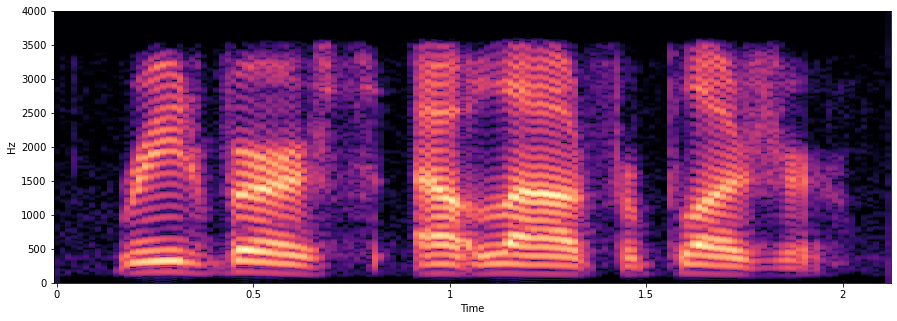

In [35]:
noisy_speech = AudioSegment.from_wav('CleanSignal\sp04.wav')
noisy_s = noisy_speech.get_array_of_samples() # samples x(t)
noisy_f = noisy_speech.frame_rate # sampling rate f - see slide 24 in week 7 lecture slides
#range of frequencies of interest for speech signal. 
#It can be any positive value, but should be a power of 2
freq_range = 2048
#window size: the number of samples per frame
#each frame is of 30ms
win_length = int(noisy_f * 0.03)
#number of samples between two consecutive frames
#by default, hop_length = win_length / 4
hop_length = int(win_length / 2)
#windowing technique
window = 'hann'

noisy_S = librosa.stft(np.float32(noisy_s), n_fft = freq_range, window = window, hop_length = hop_length, win_length = win_length)
plt.figure(figsize = (15, 5))

#convert the amplitude to decibels, just for illustration purpose
noisy_Sdb = librosa.amplitude_to_db(abs(noisy_S))
librosa.display.specshow(noisy_Sdb, sr = noisy_f, x_axis = 'time',y_axis = 'linear', hop_length = hop_length)